In [46]:
from math import *
import numpy as np
f = open("C:/Users/nacho/Downloads/abalone.data", "r")
fl = f.readlines()
len_list = []

for x in fl:
    ar = x.split(',')
    len_list.append(float(ar[1]))
len_list.sort()
pop_median = 0.5*(len_list[2087] + len_list[2088])
print(pop_median)
hist = 0
hist_bootstrap = []
count = 0
for i in range(0,4000):
    mean = 0
    stdunbiased = 0
    rand_vals = []
    cpy = len_list.copy()
    for j in range(0,10):
        val = cpy[np.random.randint(0,len(cpy))]
        rand_vals.append(val)
        cpy.remove(val)
    repeated_records = []
    for rel in range(0,7000):
        replicate = []
        for j in range(0, 10):
            replicate.append(rand_vals[np.random.randint(0,len(rand_vals))])
        replicate.sort()
        repeated_records.append(replicate)
        mean += (replicate[4] + replicate[5])/2
        if hist == 0:
            hist_bootstrap.append((replicate[4]+replicate[5])/2)
    hist = 1
    mean = mean/7000
    for rel in range(0,7000):
        stdunbiased = stdunbiased + (0.5*(repeated_records[rel][4] + repeated_records[rel][5])-mean)**2
    stdunbiased = sqrt(stdunbiased/(len(rand_vals) - 1))
    stderr = stdunbiased/sqrt(len(rand_vals))
    if pop_median < (mean + 1.645*stderr) and pop_median > (mean - 1.645*stderr):  #90% confidence interval
            count = count + 1
print(count/4000)


0.545
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
1.0


4000


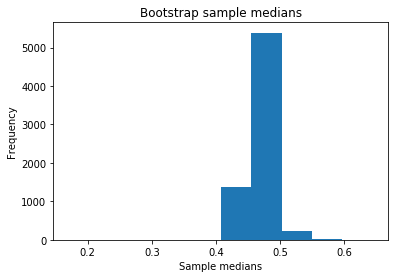

In [48]:
#plot histogram of replicates
from matplotlib import pyplot as plt 
a= np.array(hist_bootstrap)
plt.hist(a)
plt.title('Bootstrap sample medians')
plt.xlabel('Sample medians')
plt.ylabel('Frequency')
plt.show()